In [1]:
import numpy as np
import sklearn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import copy
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier, LabelPropagation, LabelSpreading

#import mvlearn
#from mvlearn.semi_supervised import CTClassifier

In [2]:
from qns3vm.qns3vm import QN_S3VM
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(42)

In [3]:
"""## Score Metrics - Accuracy, F1 score and Confusion Matrix"""

# Function to calculate the required score metrics
def score_metrics(actual_labels,predicted_labels, show = True):
  
  #Accuracy
    sys_accuracy = accuracy_score(actual_labels,predicted_labels)

  #F1 score
    sys_f1_score = f1_score(actual_labels,predicted_labels, average='micro')
    
  #Confusion Matrix
    sys_cf = confusion_matrix(actual_labels,predicted_labels)
    
    if(show):
        print("Accuracy of system is ", sys_accuracy)
        print("F1 score of system is ", sys_f1_score)
        print("Confusion Matrix of system is \n", sys_cf)
        sns.heatmap(sys_cf,annot = True)
        
    return sys_accuracy

In [4]:
# load the data
df = pd.read_csv("bank-additional-full.csv",
                 delimiter=";", dtype=str)

In [5]:
# data cleaning
df['y'].replace(['yes', 'no'],[-1, 1], inplace=True)
df['age'] = pd.to_numeric(df['age'])
df['job'].replace(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)
df['marital'].replace(['divorced','married','single','unknown'],[1,2,3,4],inplace = True)
df['education'].replace(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'],[1,2,3,4,5,6,7,8],inplace = True)
df['default'].replace(['no','yes','unknown'],[0,1,2],inplace = True)
df['housing'].replace(['no','yes','unknown'],[0,1,2],inplace = True)
df['loan'].replace(['no','yes','unknown'],[0,1,2],inplace = True)
df['contact'].replace(['cellular','telephone'],[0,1],inplace = True)
df['month'].replace(['jan', 'feb', 'mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace = True)
df['day_of_week'].replace(['mon','tue','wed','thu','fri'],[1,2,3,4,5],inplace=True)
df['duration'] = pd.to_numeric(df['duration'])
df['campaign'] = pd.to_numeric(df['campaign'])
df['pdays'] = pd.to_numeric(df['pdays'])
df['previous'] = pd.to_numeric(df['previous'])
df['poutcome'].replace(['failure','success','nonexistent'],[1,2,3],inplace=True)
df['emp.var.rate'] = pd.to_numeric(df['emp.var.rate'])
df['cons.price.idx'] = pd.to_numeric(df['cons.price.idx'])
df['cons.conf.idx'] = pd.to_numeric(df['cons.conf.idx'])
df['euribor3m'] = pd.to_numeric(df['euribor3m'])
df['nr.employed'] = pd.to_numeric(df['nr.employed'])

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_val = train_test_split(df_train, test_size = 0.2)

In [7]:
train_data = df_train.iloc[:,:-1]
train_label = df_train.iloc[:,-1]

val_data = df_val.iloc[:,:-1]
val_label = df_val.iloc[:,:-1]

test_data = df_test.iloc[:,:-1]
test_label = df_test.iloc[:,-1]

In [8]:
#Converting supervised data to semi supervised dataset
train_labelled, train_unlabelled = train_test_split(df_train, test_size=0.6)
train_data = train_labelled.iloc[:,:-1]
train_label = train_labelled.iloc[:,-1]
train_unlabelled = train_unlabelled.drop(columns = ['y'])

In [9]:
train_data_list = train_data.values.tolist()
train_label_list = train_label.values.tolist()
train_unlabelled_list = train_unlabelled.values.tolist()

In [10]:
s3vm_model = QN_S3VM(train_data_list,train_label_list,train_unlabelled_list,kernel_type='Linear',lam=1.0,random_generator = random.Random())

In [11]:
unlabelled_pred = s3vm_model.train()

In [12]:
test_pred = s3vm_model.getPredictions(test_data.values.tolist())

Accuracy of system is  0.8990046127700898
F1 score of system is  0.8990046127700898
Confusion Matrix of system is 
 [[ 187  697]
 [ 135 7219]]


0.8990046127700898

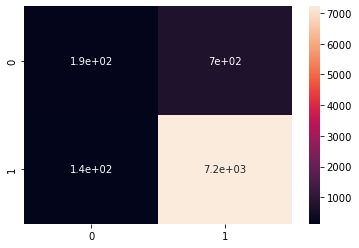

In [13]:
score_metrics(test_label.values.tolist(),test_pred)

In [19]:
import joblib

In [29]:
np.savez('s3vm_results.npz',name1 = test_label.to_numpy(),name2 = np.array(test_pred))

Accuracy of system is  0.8990046127700898
F1 score of system is  0.8990046127700898
Confusion Matrix of system is 
 [[ 187  697]
 [ 135 7219]]


0.8990046127700898

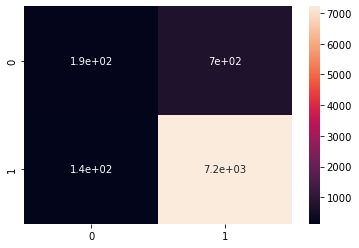

In [26]:
score_metrics(test_label.to_numpy(),np.array(test_pred))